**#linear regression(best fit)  - linearity,independance,normality,namookedasticity**


In [1]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 from imblearn.over_sampling import RandomOverSampler

In [2]:
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf

In [4]:
from sklearn.linear_model import LinearRegression

In [9]:
dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]


In [10]:
df = pd.read_csv("SeoulBikeData.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 40: invalid start byte

In [11]:
!file --mime-encoding SeoulBikeData.csv

SeoulBikeData.csv: iso-8859-1


In [12]:
!pip install chardet

In [13]:
import chardet

with open("SeoulBikeData.csv", "rb") as f:
    encoding = chardet.detect(f.read())["encoding"]

print(f"File encoding: {encoding}")

File encoding: ISO-8859-1


In [15]:
import pandas as pd

df = pd.read_csv("SeoulBikeData.csv", encoding="ISO-8859-1")

In [16]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [17]:
df = pd.read_csv("SeoulBikeData.csv", encoding="ISO-8859-1").drop(['Date','Holiday','Seasons'],axis =1)

In [18]:
df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Yes
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Yes
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Yes
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Yes


In [19]:
df.columns = dataset_cols

In [20]:
df['functional'] =  (df["functional"]=="Yes").astype(int)
df = df[df['hour'] == 12]
df = df.drop(['hour'],axis = 1)

In [21]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


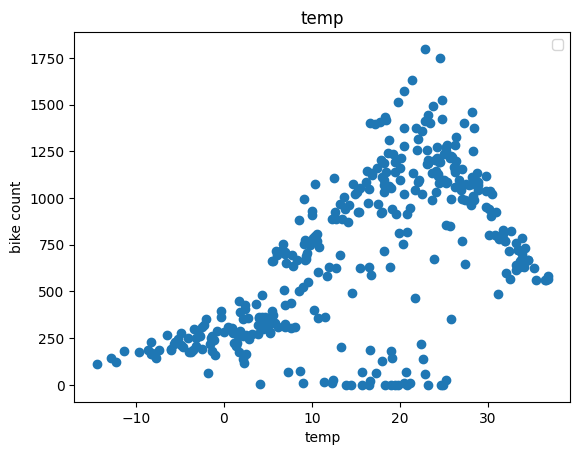

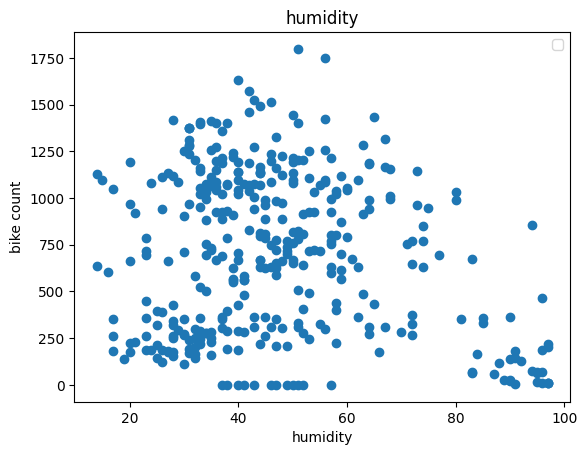

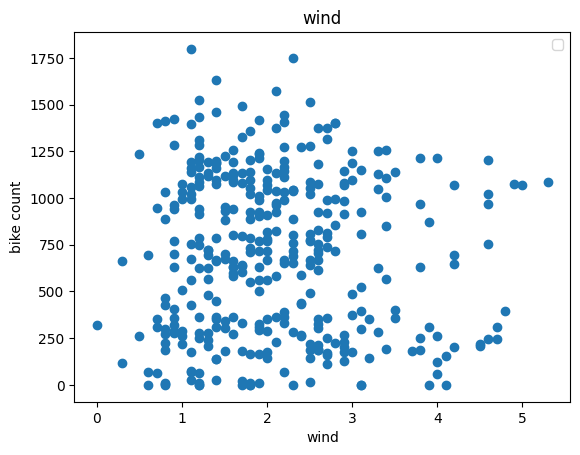

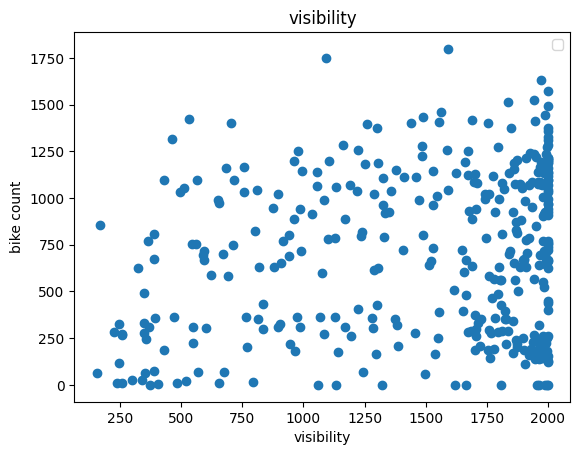

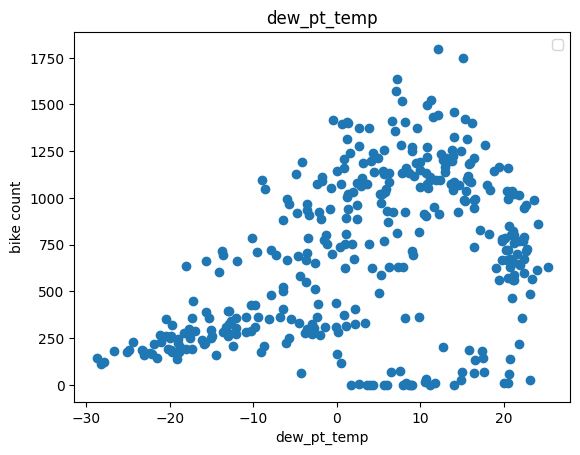

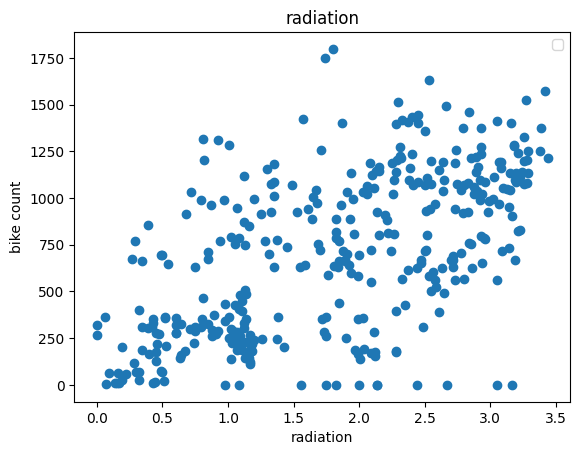

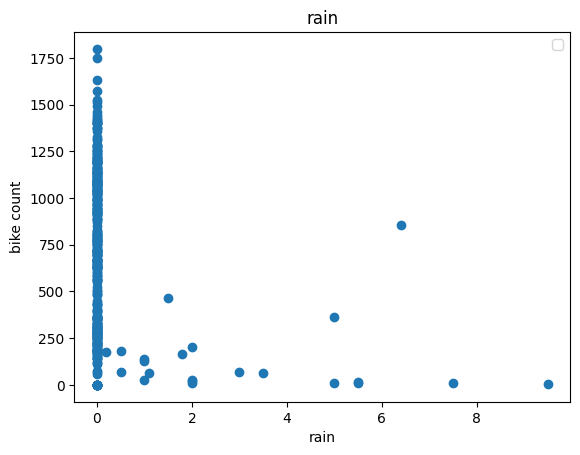

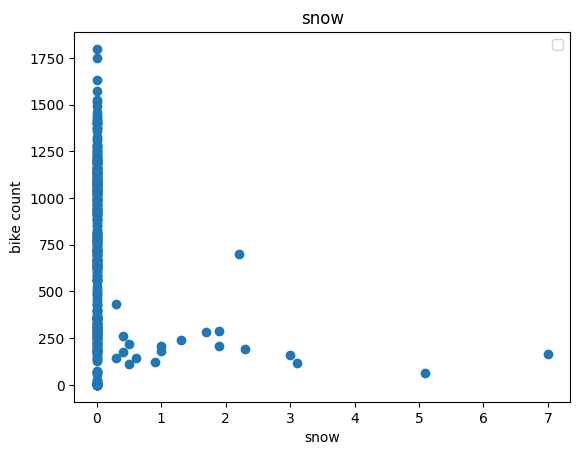

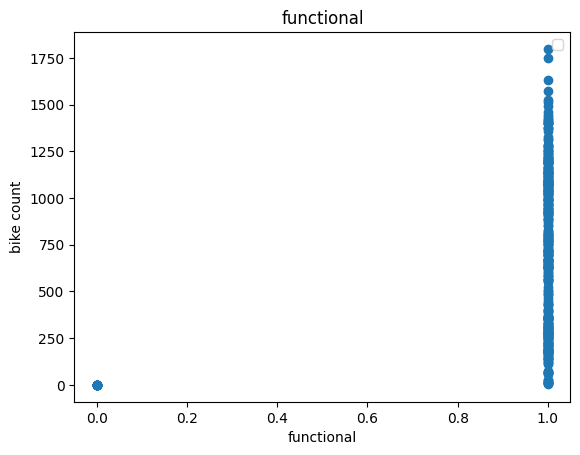

In [22]:
for label in df.columns [1:]:
  plt.scatter(df[label],df["bike_count"])
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel("bike count")
  plt.legend()
  plt.show()


In [23]:
df = df.drop(['wind','visibility','functional'],axis = 1)

In [24]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


train/valid/test dataset


In [25]:
train,val,test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [26]:
def get_xy(dataframe,y_label,x_labels =None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None :
    x = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      x = dataframe[x_labels[0]].values.reshape(-1,1)
    else :
      x = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1,1)
  data = np.hstack((x,y))
  return data,x,y

In [27]:
_, X_train_temp, y_train_temp = get_xy(train, "bike_count", x_labels=["temp"])
_, X_val_temp, y_val_temp = get_xy(val, "bike_count", x_labels=["temp"])
_, X_test_temp, y_test_temp = get_xy(test, "bike_count", x_labels=["temp"])

In [29]:
X_train_temp

array([[ 26.7],
       [  0.5],
       [-14.4],
       [ 31.7],
       [ 10.7],
       [ 25.7],
       [ 12.8],
       [ -5.6],
       [ 25.2],
       [ 24.2],
       [ 18.4],
       [ 21.2],
       [ 10.6],
       [ 33.8],
       [ 30.2],
       [ 22.9],
       [ 26.3],
       [ 20.5],
       [ 34.2],
       [  7.3],
       [ 20.7],
       [ 35.5],
       [ 18.9],
       [ 17.4],
       [  5.5],
       [ 33.4],
       [ 14.2],
       [ 11.5],
       [ 18. ],
       [ 25.2],
       [ 21.1],
       [  2.4],
       [  9.2],
       [ 27.8],
       [ 29.8],
       [ 18.2],
       [  2.2],
       [ 30.8],
       [ 14.6],
       [  1.1],
       [ 31.1],
       [ 23.8],
       [  1. ],
       [ 24. ],
       [  3.2],
       [  4.1],
       [ 26.9],
       [ 28.9],
       [ -2.7],
       [ 20.5],
       [  1.5],
       [  8.5],
       [  3.9],
       [ 34.1],
       [  2.5],
       [ 28.4],
       [  1.4],
       [  5.8],
       [ 22.2],
       [ 16.5],
       [  1.7],
       [  0.9],
       [

In [31]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp,y_train_temp)

LinearRegression()

In [32]:
print(temp_reg.coef_,temp_reg.intercept_)

[[20.54150851]] [380.83652272]


In [34]:
temp_reg.score(X_test_temp,y_test_temp)

0.38999157924734684

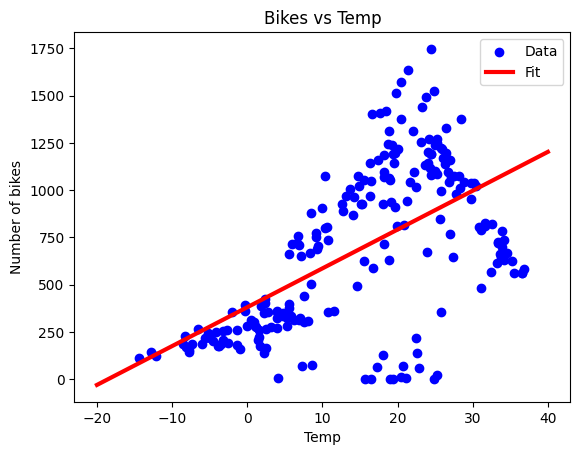

In [38]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

In [40]:
df.columns

Index(['bike_count', 'temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain',
       'snow'],
      dtype='object')

multiple regression


In [46]:
train,val,test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])
_, X_train_all, y_train_all = get_xy(train, "bike_count", x_labels=['temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain',
       'snow'])
_, X_val_all, y_val_all = get_xy(val, "bike_count", x_labels=['temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain',
       'snow'])
_, X_test_all, y_test_all = get_xy(test, "bike_count", x_labels=['temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain',
       'snow'])

In [48]:
all_reg = LinearRegression()
all_reg.fit(X_train_all,y_train_all)

LinearRegression()

In [50]:
all_reg.score(X_test_all,y_test_all)

0.558079064191646

NEURAL NETS FOR REGRESSION


In [51]:
_, X_train_temp, y_train_temp = get_xy(train, "bike_count", x_labels=["temp"])
_, X_val_temp, y_val_temp = get_xy(val, "bike_count", x_labels=["temp"])
_, X_test_temp, y_test_temp = get_xy(test, "bike_count", x_labels=["temp"])

In [55]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [56]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [57]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [58]:
history = temp_nn_model.fit(
    X_train_temp.reshape(-1), y_train_temp,
    verbose=0,
    epochs=1000,
    validation_data=(X_val_temp, y_val_temp)
)

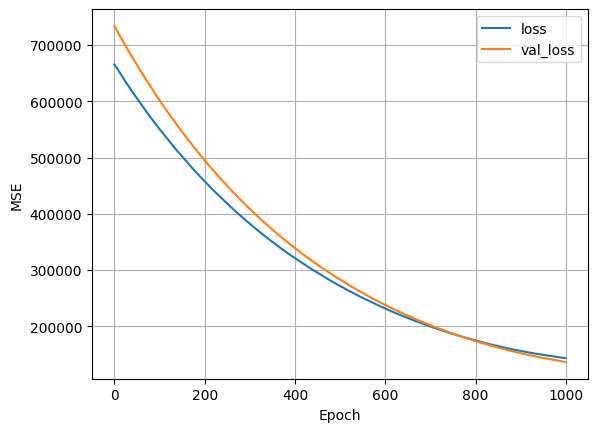

In [59]:
plot_loss(history)

4/4 [==============================] - 0s 3ms/step


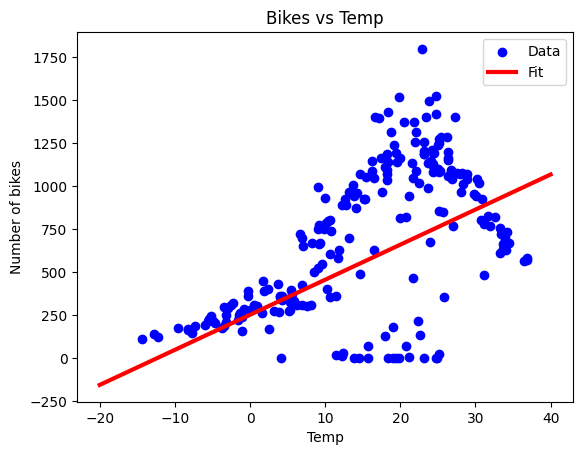

In [60]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

Neural Net

In [61]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [62]:
history = nn_model.fit(
    X_train_temp, y_train_temp,
    validation_data=(X_val_temp, y_val_temp),
    verbose=0, epochs=100
)

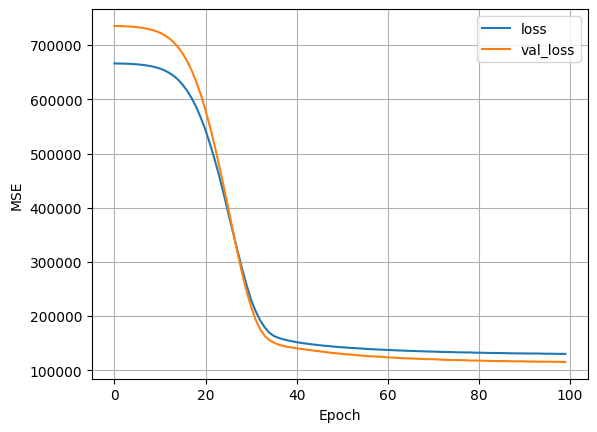

In [63]:
plot_loss(history)

In [64]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis=-1)
all_normalizer.adapt(X_train_all)

In [65]:
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [66]:
history = nn_model.fit(
    X_train_all, y_train_all,
    validation_data=(X_val_all, y_val_all),
    verbose=0, epochs=100
)

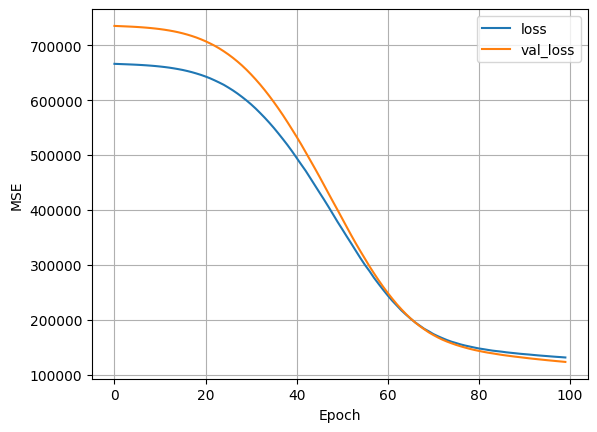

In [67]:
plot_loss(history)

In [68]:
# calculate the MSE for both linear reg and nn
y_pred_lr = all_reg.predict(X_test_all)
y_pred_nn = nn_model.predict(X_test_all)

3/3 [==============================] - 0s 4ms/step


In [70]:
def MSE(y_pred, y_real):
  return (np.square(y_pred - y_real)).mean()

In [71]:
MSE(y_pred_lr, y_test_all)

88828.50122083543

In [72]:
MSE(y_pred_nn, y_test_all)

121988.44564392763

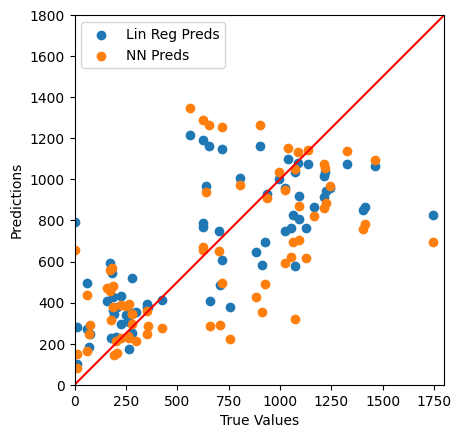

In [73]:
ax = plt.axes(aspect="equal")
plt.scatter(y_test_all, y_pred_lr, label="Lin Reg Preds")
plt.scatter(y_test_all, y_pred_nn, label="NN Preds")
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims = [0, 1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims, lims, c="red")